In [10]:
import fastprogress
import pandas as pd
from fastai.vision.all import *
from fastai.learner import *
import os
from pathlib import Path
from IPython.display import clear_output

# Setup

In [11]:
df = pd.read_csv("../data/test_labels.csv")
df["FILE_PATH"] = df.apply(lambda row: f"""../data/test_features/{row["FILE_NAME"]}""", axis=1)

In [12]:
def get_label_from_df(s):
    return ""

learner = load_learner(Path()/"models/model-stage11_.pkl",cpu=False)

# Predict on validation dataset

In [13]:
df_predict = df.copy(deep=True)
df_predict = df_predict[["FILE_PATH","EXPECTED_CLASS"]]
df_predict["PREDICTED_CLASS"] = df_predict["FILE_PATH"].apply(lambda fp: learner.predict(Path(fp))[0])
clear_output()

# Compute Metrics

In [14]:
df_predict["SUCCESS"] = (df_predict["EXPECTED_CLASS"]==df_predict["PREDICTED_CLASS"])
total_samples = len(df_predict)
success = len(df_predict[df_predict["SUCCESS"]==True])
accuracy = success / total_samples
print(f"Accuracy: {accuracy}")
print(f"Test sample size: {total_samples} images")

Accuracy: 0.8
Test sample size: 60 images


## Failed predictions

In [15]:
df_predict[df_predict["SUCCESS"]==False]

,FILE_PATH,EXPECTED_CLASS,PREDICTED_CLASS,SUCCESS
3,../data/test_features/ZJ016595.jpg,monkey_prosimian,blank,False
5,../data/test_features/ZJ016597.jpg,monkey_prosimian,blank,False
6,../data/test_features/ZJ016616.jpg,leopard,antelope_duiker,False
8,../data/test_features/ZJ016695.jpg,monkey_prosimian,antelope_duiker,False
12,../data/test_features/ZJ016885.jpg,monkey_prosimian,antelope_duiker,False
14,../data/test_features/ZJ017018.jpg,antelope_duiker,blank,False
26,../data/test_features/ZJ017203.jpg,monkey_prosimian,blank,False
39,../data/test_features/ZJ016561.jpg,antelope_duiker,monkey_prosimian,False
49,../data/test_features/ZJ018294.jpg,civet_genet,blank,False
50,../data/test_features/ZJ018372.jpg,civet_genet,antelope_duiker,False


## Demo

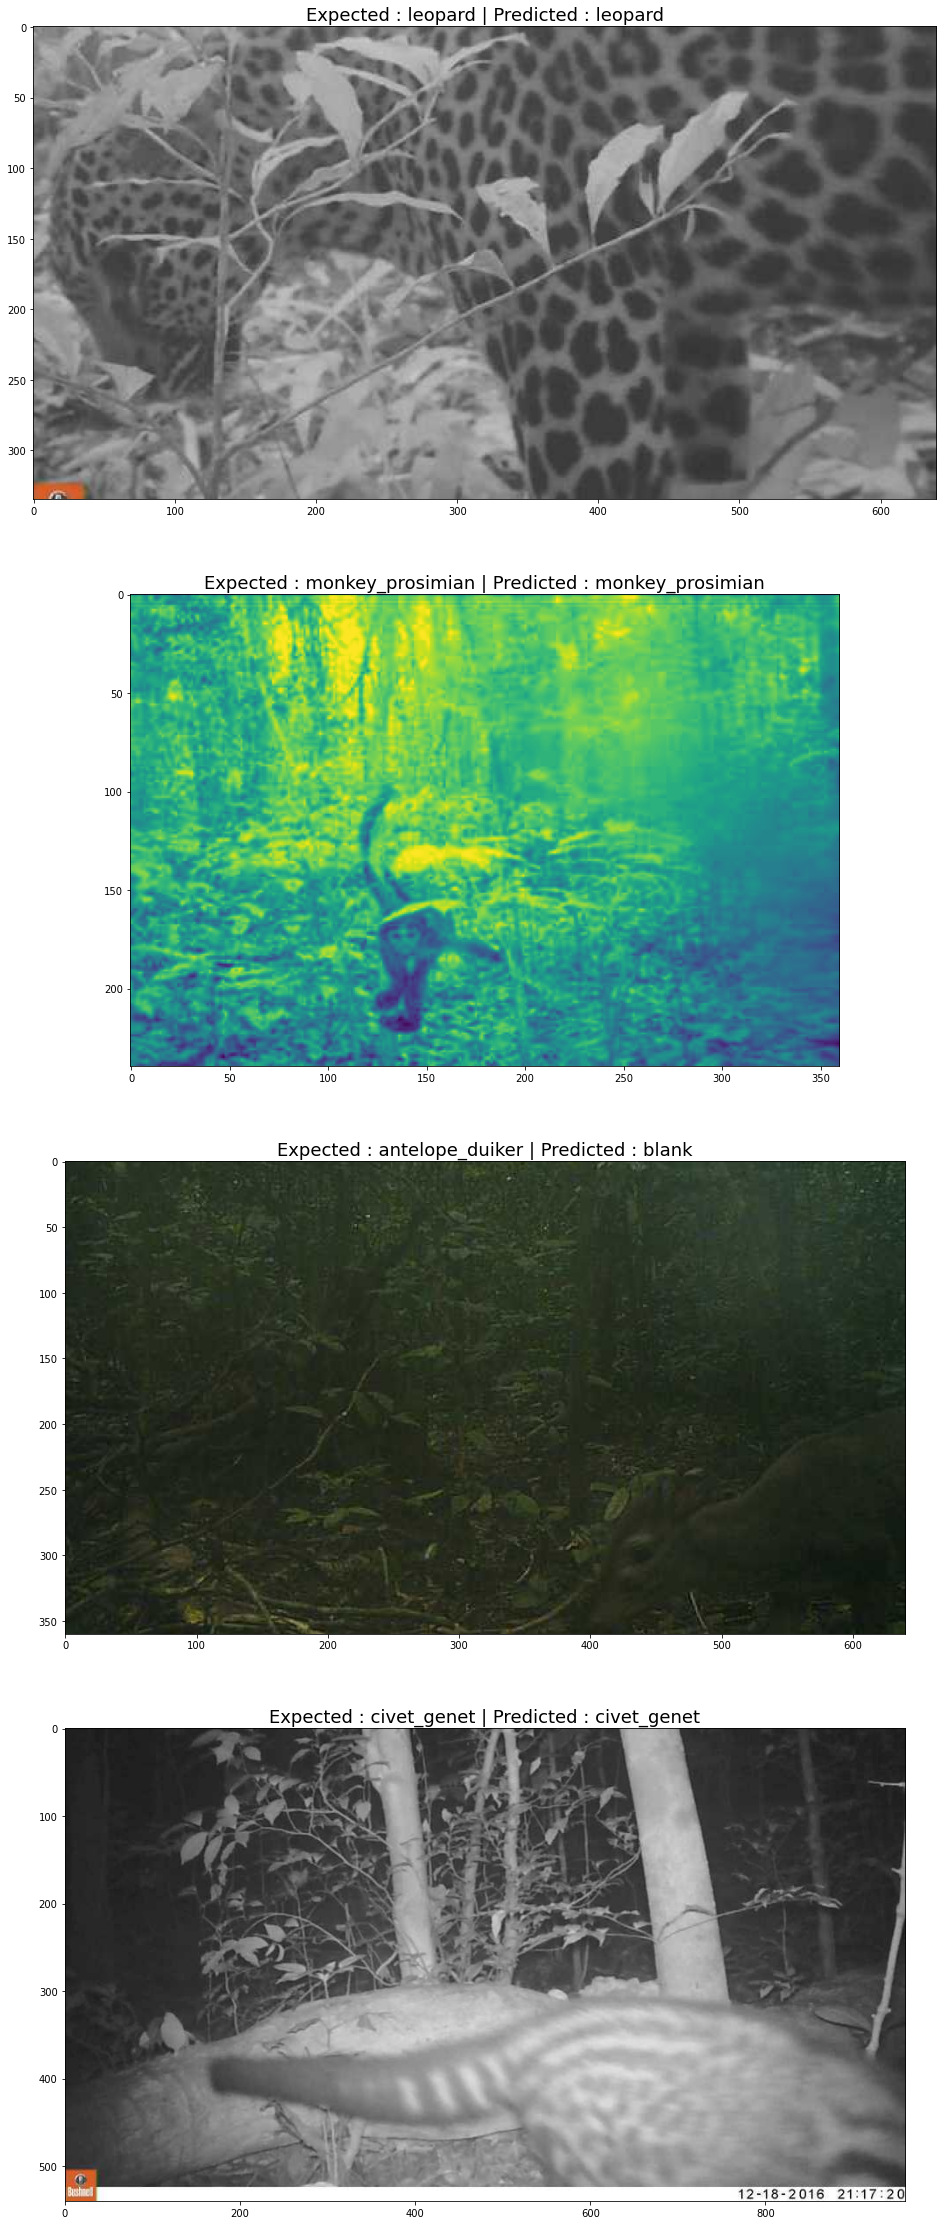

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

random_state = 42
expected_labels = df_predict["EXPECTED_CLASS"].unique().tolist()
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(40, 40))
for expected, ax in zip(expected_labels, axes.flat):
    random_sample = df_predict[df_predict["EXPECTED_CLASS"]==expected].sample(1)
    sample_path=random_sample["FILE_PATH"].values[0]
    predicted=random_sample["PREDICTED_CLASS"].values[0]
    img = mpimg.imread(sample_path)
    ax.imshow(img)
    ax.set_title(f"Expected : {expected} | Predicted : {predicted}", fontsize="18")